# GE CSU Hackathon
--------------------------------------------------------------------------------------------------------------------------------

## Parking Lot Anaysis
### We have predicted whether we need to open a parking lot temporarily for stipulated hours

--------------------------------------------------------------------------------------------------------------------------------

#### Jagannathan Chengavalli Lakshminarayanan
#### Vivek Agarwal
#### Manikandan Easwaran
#### Harminder Singh
#### Christopher Carlson
#### Richar Shu

#### Faculty Advisor: John Hurley

In [1]:
# Importing KMeans clustering for unsupervised learning
from sklearn.cluster import KMeans

In [2]:
# Importing the required packages and libraries
# we will need numpy and pandas later
import numpy as np
import pandas as pd

# Allows charts to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


In [3]:
'''
We gathered a dataset consisting of the following features for a particular location,
1. Traffic Count
2. Pedestrian Count
3. Number of Cars Parked
4. Date and Time

Based on these features, we selected only the 'contributing features' for the feature matrix,
that might help us in narrrowing the probability of opening a parking lot near that location.

The following data frames were for 2 specific location
df1 = 101 Ash St, San Diego, CA 92101, USA
df2 = 939 Fourth Ave, San Diego, CA 92101, USA

With the help of KMeans clustering, we created 2 clusters 0/1 or Yes/No that determines whether we need to
open/create a new parking lot near that location in that particular time period.

'''

# reading a CSV file directly from local machine, and store it in a pandas DataFrame:
# "read_csv" is a pandas function to read csv files from web or local device:
df1 = pd.read_csv('C:/Users/harish/Desktop/GE_CSU_Hackathon/Data/AGG.csv')
df2 = pd.read_csv('C:/Users/harish/Desktop/GE_CSU_Hackathon/Data/AGG2.csv')

print (df1.head())
print (df2.head())

                          ParkingId TrafficId PedestrainId              Date  \
0  257a232d15aebdc49b7ab7d734cce398  a0fa8a2f     a0fa8a2f  06-02-2018 00:00   
1  257a232d15aebdc49b7ab7d734cce398  a0fa8a2f     a0fa8a2f  06-02-2018 01:00   
2  257a232d15aebdc49b7ab7d734cce398  a0fa8a2f     a0fa8a2f  06-02-2018 02:00   
3  257a232d15aebdc49b7ab7d734cce398  a0fa8a2f     a0fa8a2f  06-02-2018 03:00   
4  257a232d15aebdc49b7ab7d734cce398  a0fa8a2f     a0fa8a2f  06-02-2018 04:00   

   CarsParked  TrafficCount  PedCount  
0           0             0         0  
1           0             0         0  
2           0             0         0  
3           0             1         0  
4           0             1         0  
                          ParkingId TrafficId Pedestrian              Date  \
0  fbc0c37b8307f1c2d4412354d5e0c5ca  a303efd4   a301ed4d  06-02-2018 00:00   
1  fbc0c37b8307f1c2d4412354d5e0c5ca  a303efd4   a301ed4d  06-02-2018 01:00   
2  fbc0c37b8307f1c2d4412354d5e0c5ca  a303efd4

## Converted the given Date into basic Date and Time format
--------------------------------------------------------------------------------------------------------------------------------

In [4]:
# Fix the Date column, splitting them into their primitives

def fix_date_time(df):
    def extract_field(_df, start, stop):
        return _df['Date'].map(lambda dt: int(dt[start:stop]))
    df['Day'] = extract_field(df,0,2)
    df['Month'] = extract_field(df,3,5)
    df['Year'] = extract_field(df,6,10)
    df['Hour'] = extract_field(df,11,13)
    df['Minute'] = extract_field(df,14,16)
    
    return df.drop(['Date'], axis = 1)

df1 = fix_date_time(df1)
df2 = fix_date_time(df2)
print(df1.head())
print(df2.head())

                          ParkingId TrafficId PedestrainId  CarsParked  \
0  257a232d15aebdc49b7ab7d734cce398  a0fa8a2f     a0fa8a2f           0   
1  257a232d15aebdc49b7ab7d734cce398  a0fa8a2f     a0fa8a2f           0   
2  257a232d15aebdc49b7ab7d734cce398  a0fa8a2f     a0fa8a2f           0   
3  257a232d15aebdc49b7ab7d734cce398  a0fa8a2f     a0fa8a2f           0   
4  257a232d15aebdc49b7ab7d734cce398  a0fa8a2f     a0fa8a2f           0   

   TrafficCount  PedCount  Day  Month  Year  Hour  Minute  
0             0         0    6      2  2018     0       0  
1             0         0    6      2  2018     1       0  
2             0         0    6      2  2018     2       0  
3             1         0    6      2  2018     3       0  
4             1         0    6      2  2018     4       0  
                          ParkingId TrafficId Pedestrian  CarsParked  \
0  fbc0c37b8307f1c2d4412354d5e0c5ca  a303efd4   a301ed4d           0   
1  fbc0c37b8307f1c2d4412354d5e0c5ca  a303efd4   a30

In [5]:
#df1.to_csv("s1.csv")

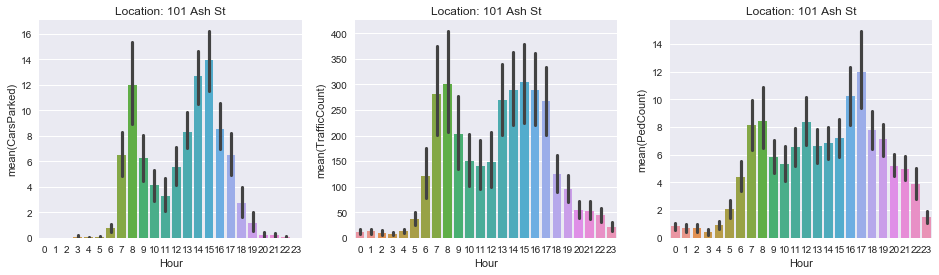

In [6]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))

ax1.set_title("Location: 101 Ash St")
ax2.set_title("Location: 101 Ash St")
ax3.set_title("Location: 101 Ash St")
sns.barplot(x="Hour", y="CarsParked", data=df1, ax=ax1);
sns.barplot(x="Hour", y="TrafficCount", data=df1, ax=ax2);
sns.barplot(x="Hour", y="PedCount", data=df1, ax=ax3);

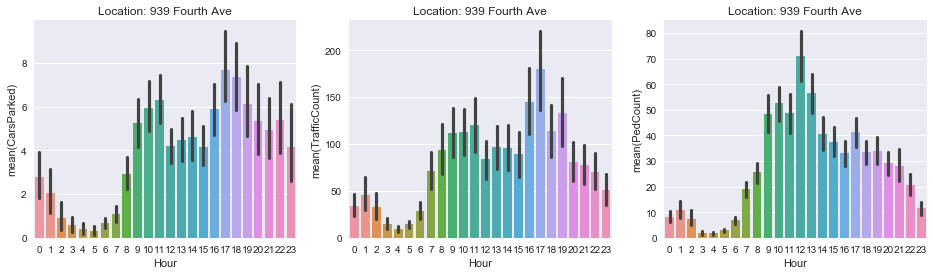

In [7]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))
ax1.set_title("Location: 939 Fourth Ave")
ax2.set_title("Location: 939 Fourth Ave")
ax3.set_title("Location: 939 Fourth Ave")
sns.barplot(x="Hour", y="CarsParked", data=df2, ax=ax1);
sns.barplot(x="Hour", y="TrafficCount", data=df2, ax=ax2);
sns.barplot(x="Hour", y="PedCount", data=df2, ax=ax3);

## Created a feature matrix with contributing features
### Applied KMeans on both the dataframes, generated the labels and created a new label column for the same
--------------------------------------------------------------------------------------------------------------------------------

In [8]:
# Create a python list of feature names that would like to pick from the dataset:

feature_cols = ['CarsParked','TrafficCount','PedCount','Hour']

# Use the above list to select the features from the original DataFrame
X1 = df1[feature_cols]
X2 = df2[feature_cols]

#print (X1.head())
#print (X2.head())

# Clustering: Creating 2 clusters, whether to OPEN a parking lot or NOT to OPEN
my_KMeans1 = KMeans(n_clusters=2)
my_KMeans2 = KMeans(n_clusters=2)

my_KMeans1.fit(X1)
my_KMeans2.fit(X2)

# Assigned Labels after clustering: 
labels1 = my_KMeans1.labels_
labels2 = my_KMeans2.labels_

# Centers of the clusters:
centers1 = my_KMeans1.cluster_centers_
centers2 = my_KMeans2.cluster_centers_

#print(np.unique(labels1)) -- 0/1 
#print(np.unique(labels2)) -- 0/1

# Creating a new column in the df after KMeans
df1['Open_A_Parking_Lot'] = labels1
df2['Open_A_Parking_Lot'] = labels2

print(df1.head())
print(df2.head())

                          ParkingId TrafficId PedestrainId  CarsParked  \
0  257a232d15aebdc49b7ab7d734cce398  a0fa8a2f     a0fa8a2f           0   
1  257a232d15aebdc49b7ab7d734cce398  a0fa8a2f     a0fa8a2f           0   
2  257a232d15aebdc49b7ab7d734cce398  a0fa8a2f     a0fa8a2f           0   
3  257a232d15aebdc49b7ab7d734cce398  a0fa8a2f     a0fa8a2f           0   
4  257a232d15aebdc49b7ab7d734cce398  a0fa8a2f     a0fa8a2f           0   

   TrafficCount  PedCount  Day  Month  Year  Hour  Minute  Open_A_Parking_Lot  
0             0         0    6      2  2018     0       0                   0  
1             0         0    6      2  2018     1       0                   0  
2             0         0    6      2  2018     2       0                   0  
3             1         0    6      2  2018     3       0                   0  
4             1         0    6      2  2018     4       0                   0  
                          ParkingId TrafficId Pedestrian  CarsParked  \
0  

## Plotting of results with different perceptions
--------------------------------------------------------------------------------------------------------------------------------

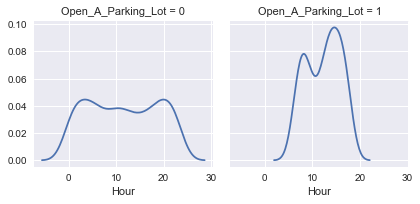

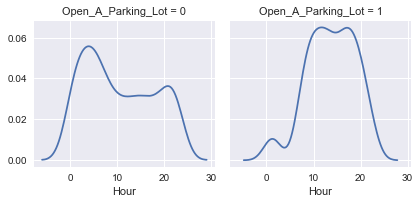

In [9]:
# Location 1
df_plot1 = df1[df1['Open_A_Parking_Lot'].isin([0, 1])]
g = sns.FacetGrid(df_plot1, col="Open_A_Parking_Lot")
g.map(sns.kdeplot, "Hour")


# Location 2
df_plot2 = df2[df2['Open_A_Parking_Lot'].isin([0, 1])]
g = sns.FacetGrid(df_plot2, col="Open_A_Parking_Lot")
g.map(sns.kdeplot, "Hour")

In [10]:
def numeric_to_categorical(x):
    if x == 1:
        return 'Yes'
    else:
        return 'No'

df1['Open_A_Parking_Lot'] = df1['Open_A_Parking_Lot'].apply(numeric_to_categorical)
df2['Open_A_Parking_Lot'] = df2['Open_A_Parking_Lot'].apply(numeric_to_categorical)

df1.head()

,ParkingId,TrafficId,PedestrainId,CarsParked,TrafficCount,PedCount,Day,Month,Year,Hour,Minute,Open_A_Parking_Lot
0,257a232d15aebdc49b7ab7d734cce398,a0fa8a2f,a0fa8a2f,0,0,0,6,2,2018,0,0,No
1,257a232d15aebdc49b7ab7d734cce398,a0fa8a2f,a0fa8a2f,0,0,0,6,2,2018,1,0,No
2,257a232d15aebdc49b7ab7d734cce398,a0fa8a2f,a0fa8a2f,0,0,0,6,2,2018,2,0,No
3,257a232d15aebdc49b7ab7d734cce398,a0fa8a2f,a0fa8a2f,0,1,0,6,2,2018,3,0,No
4,257a232d15aebdc49b7ab7d734cce398,a0fa8a2f,a0fa8a2f,0,1,0,6,2,2018,4,0,No


## Inference from the KMeans analysis
--------------------------------------------------------------------------------------------------------------------------------

### We could see that, on an average parking time of 2 hours, the following time slots needs an alternative parking lot which can be opened adjacent to the location, 

### 101 Ash St, San Diego, CA 92101, USA
------------------------------------------------

#### Time Slots:
#### 7:00 AM - 9:00 AM
#### 1:00 PM - 3:00 PM
#### 3:00 PM - 5:00 PM

--------------------------------------------------------------------------------------------------------------------------------


### 939 Fourth Ave, San Diego, CA 92101, USA
----------------------------------------------------

#### Time Slots:
#### 7:00 AM - 9:00 AM
#### 9:00 AM - 11:00 AM
#### 11:00 AM - 1:00 PM
#### 1:00 PM - 3:00 PM
#### .....
#### .....
#### Basically from 7:00 AM - 9:00 PM with 2 hour interval for each car

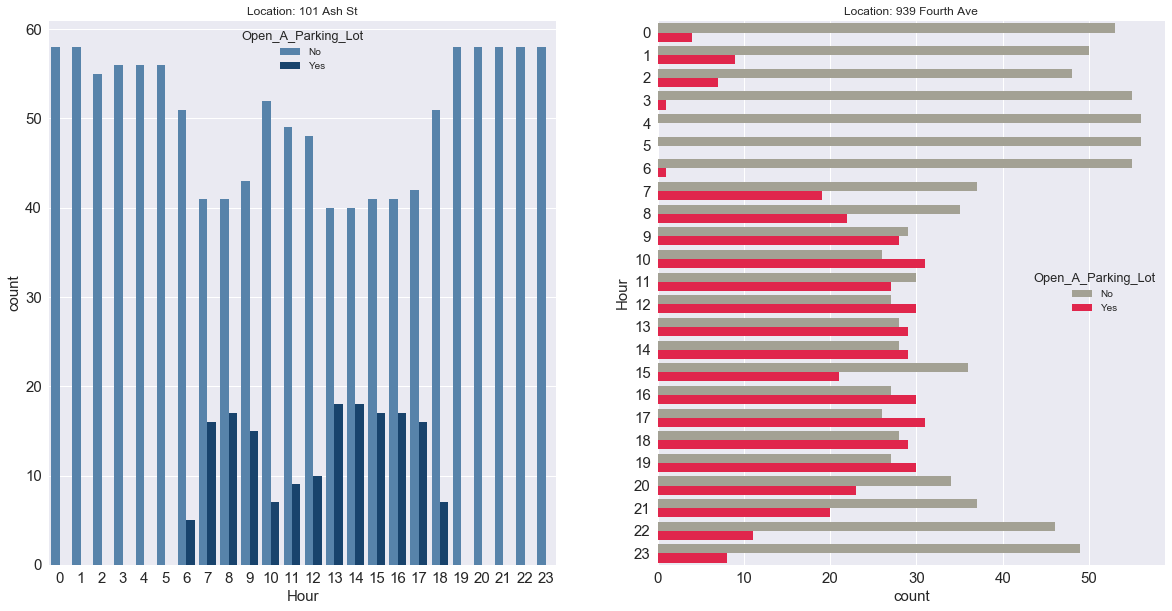

In [11]:
#Plotting the results

#sns.xkcd_rgb["pale red"],sns.xkcd_rgb["medium green"]
colors1 = [sns.xkcd_rgb["cool blue"], sns.xkcd_rgb["twilight blue"]]
colors2 = [sns.xkcd_rgb["cement"], sns.xkcd_rgb["neon red"]]

import seaborn as sns1
sns1.set(rc={'figure.figsize':(20.0, 10.0),'axes.labelsize':15,'xtick.labelsize':15,'ytick.labelsize':15})
f, (ax1, ax2) = plt.subplots(1, 2)

ax1.set_title("Location: 101 Ash St")
ax2.set_title("Location: 939 Fourth Ave")
sns1.countplot(data=df1, x='Hour',hue='Open_A_Parking_Lot', ax=ax1, palette=colors1)
sns1.countplot(data=df2, y='Hour',hue='Open_A_Parking_Lot', ax=ax2, palette=colors2)